## 1. Data Analysis - PE/COFF Feature Sets.
    - Feature sets:
      1. ASM Features.
      2. PE Header Features.
      3. Entropy Features.
      4. File ID Features.
      5. Trid ID Features.
      6. Packer ID Features.
      7. Call Graph Features.
      8. Function Count Features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.mlab as mlab
import warnings
warnings.filterwarnings('ignore') # this is really annoying.

## 2. APT All Combined Feature Statistics

In [2]:

all_combined_train_features = pd.read_csv('data/combined-pe-features-apt.csv')
combined_train_features = pd.read_csv('data/combined-pe-features-apt-reduced.csv')
# BROKEN DO NOT USE: function_counts = pd.read_csv('data/call-graph-reduced-function_counts-apt.csv')
train_labels = pd.read_csv('data/sorted-pe-coff-train-labels-apt.csv')

combined_train_features.head()

,file_name,edx,esi,es,fs,ds,ss,gs,cs,ah,...,IsWindow,WinHttpOpen,vertex_count,edge_count,delta_max,density,file_size,file_id,trid_id,packer_id
0,001dd76872d80801692ff942308c64e6,556,859,0,0,0,0,0,0,0,...,0,0,354,455,34,0.232975,32768,1,21,1111
1,002325a0a67fded0381b5648d7fe9b8e,556,860,0,0,0,0,0,0,0,...,0,0,356,457,34,0.233999,33792,1,21,1111
2,00dbb9e1c09dbdafb360f3163ba5a3de,983,2246,0,0,0,0,0,0,1,...,0,0,376,1506,121,0.144253,65024,1,24,0
3,0149b7bd7218aab4e257d28469fddb0d,76,376,0,0,0,0,0,0,0,...,0,0,344,381,44,0.721591,17408,1,21,1111
4,01e0dc079d4e33d8edd050c4900818da,1107,2517,0,0,0,0,0,0,1,...,0,0,1164,1589,121,0.019519,131072,1,1,1111


In [14]:
all_combined_train_features.head()

,file_name,edx,esi,es,fs,ds,ss,gs,cs,ah,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
0,001dd76872d80801692ff942308c64e6,556,859,0,0,0,0,0,0,0,...,354,455,34,0.232975,0.804603,32768,1,4.6,21,1111
1,002325a0a67fded0381b5648d7fe9b8e,556,860,0,0,0,0,0,0,0,...,356,457,34,0.233999,0.798349,33792,1,4.6,21,1111
2,00dbb9e1c09dbdafb360f3163ba5a3de,983,2246,0,0,0,0,0,0,1,...,376,1506,121,0.144253,0.789731,65024,1,6.4,24,0
3,0149b7bd7218aab4e257d28469fddb0d,76,376,0,0,0,0,0,0,0,...,344,381,44,0.721591,0.725844,17408,1,4.6,21,1111
4,01e0dc079d4e33d8edd050c4900818da,1107,2517,0,0,0,0,0,0,1,...,1164,1589,121,0.019519,0.735541,131072,1,7.4,1,1111


In [5]:
# BROKEN: do not use.
function_counts.head()

,filename,HandlerP,sub_1,WaitForS,Terminat,CloseHan,ServiceM,wcstombs,Register,esi,...,_4046A4,_strupr,off_4694,'off_489,off_4894,off_4925,'sub_463,'sub_465,_404224,_0CWinAp
b3bc979d8de3be09728c5de1a0297c4b,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
95f25d3afc5370f5d9fd8e65c17d3599,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
54d5d171a482278cc8eacf08d9175fd7,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
b8f61242e28f2edf6cb1be8781438491,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
80856bd8ef7d5dbc3dc774f581855549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
train_labels.head()

,label
0,2057
1,2057
2,2064
3,2057
4,2064


In [3]:
X_all = all_combined_train_features.iloc[:,1:]
y = train_labels['label']
X_all.head()

,edx,esi,es,fs,ds,ss,gs,cs,ah,al,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
0,556,859,0,0,0,0,0,0,0,123,...,354,455,34,0.232975,0.804603,32768,1,4.6,21,1111
1,556,860,0,0,0,0,0,0,0,123,...,356,457,34,0.233999,0.798349,33792,1,4.6,21,1111
2,983,2246,0,0,0,0,0,0,1,1289,...,376,1506,121,0.144253,0.789731,65024,1,6.4,24,0
3,76,376,0,0,0,0,0,0,0,62,...,344,381,44,0.721591,0.725844,17408,1,4.6,21,1111
4,1107,2517,0,0,0,0,0,0,1,1244,...,1164,1589,121,0.019519,0.735541,131072,1,7.4,1,1111


In [ ]:
X_all.describe()

In [4]:
# Train feature stats
X_all_train_means = X_all.mean()
X_all_train_medians = X_all.median()
X_all_train_maxs = X_all.max()
X_all_train_mins = X_all.min()
X_all_train_std = X_all.std()
X_all_train_cor = X_all.corr()
X_all_train_cov = X_all.cov()
X_all_train_maxs.head()

edx    18456.0
esi    26599.0
es       448.0
fs         3.0
ds        78.0
dtype: float64

In [3]:
X_all.shape

(271, 1265)

In [12]:
X_all_train_cor.head()

,edx,esi,es,fs,ds,ss,gs,cs,ah,al,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
edx,1.000000,0.980658,0.885091,0.144179,0.658826,0.794992,0.262200,0.679199,0.950214,0.717201,...,0.937274,0.966455,0.652011,-0.184282,0.364871,0.720064,0.107594,0.032300,-0.123933,-0.237400
esi,0.980658,1.000000,0.897023,0.219195,0.720508,0.735560,0.346871,0.737814,0.968854,0.773632,...,0.970948,0.993136,0.654791,-0.209421,0.392831,0.743597,0.098682,0.032701,-0.148728,-0.258391
es,0.885091,0.897023,1.000000,-0.043209,0.904293,0.476535,0.124256,0.916303,0.957211,0.553578,...,0.818668,0.863607,0.429619,-0.116186,0.257938,0.634228,0.076967,0.009250,-0.106471,-0.207156
fs,0.144179,0.219195,-0.043209,1.000000,0.030469,0.314913,0.982923,0.027409,0.160390,0.348085,...,0.279805,0.280708,0.371011,-0.163756,0.230031,0.134815,-0.027270,-0.011013,-0.126180,0.052133
ds,0.658826,0.720508,0.904293,0.030469,1.000000,0.120040,0.213882,0.999562,0.839451,0.438260,...,0.650863,0.697304,0.273203,-0.092576,0.191863,0.495545,0.049009,0.000728,-0.083276,-0.133115


In [10]:
X_all_train_cor.to_csv('data/pe-coff-feature-corr-apt.csv')

In [11]:
X_all_train_cov.head()

,edx,esi,es,fs,ds,ss,gs,cs,ah,al,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
edx,1.148336e+07,1.578720e+07,197619.202938,354.119038,23471.405549,5445.001080,650.494506,24808.613721,122085.338759,1.011129e+06,...,2.849803e+06,7.840000e+06,153202.799768,-745.392736,84.946291,4.558807e+08,1276.425584,250.699341,-3254.756239,-316683.637994
esi,1.578720e+07,2.256869e+07,280778.137939,754.741451,35985.376794,7062.722140,1206.416263,37780.798114,174509.473896,1.529041e+06,...,4.138693e+06,1.129436e+07,215691.666544,-1187.524602,128.212279,6.599887e+08,1641.206355,355.825141,-5475.728031,-483214.304428
es,1.976192e+05,2.807781e+05,4341.236572,-2.063441,626.397813,63.460312,5.993754,650.753834,2391.232527,1.517459e+04,...,4.839813e+04,1.362143e+05,1962.762690,-9.137519,1.167595,7.807241e+06,17.753629,1.395870,-54.366817,-5372.972803
fs,3.541190e+02,7.547415e+02,-2.063441,0.525325,0.232172,0.461323,0.521566,0.214131,4.407558,1.049617e+02,...,1.819629e+02,4.870451e+02,18.645688,-0.141670,0.011454,1.825560e+04,-0.069195,-0.018282,-0.708760,14.874402
ds,2.347141e+04,3.598538e+04,626.397813,0.232172,110.526965,2.550704,1.646207,113.269892,334.608624,1.916890e+03,...,6.139561e+03,1.754914e+04,199.157537,-1.161714,0.138579,9.733359e+05,1.803786,0.017536,-6.785021,-550.899030


In [13]:
X_all_train_cov.to_csv('data/pe-coff-feature-cov-apt.csv')

In [4]:
all_column_names = list(all_combined_train_features.columns)

In [ ]:
all_column_names[:20]

In [5]:
all_train_stats = pd.DataFrame()
all_train_stats['feature_name'] = all_column_names[1:]
all_train_stats.head()

,feature_name
0,edx
1,esi
2,es
3,fs
4,ds


In [6]:
all_train_stats['mean'] = list(X_all_train_means)
all_train_stats['median'] = list(X_all_train_medians)
all_train_stats['standard_deviation'] = list(X_all_train_std)
all_train_stats['max'] = list(X_all_train_maxs)
all_train_stats['min'] = list(X_all_train_mins)
all_train_stats.head()

,feature_name,mean,median,standard_deviation,max,min
0,edx,1234.324723,209.0,3388.710600,18456.0,0.0
1,esi,1899.760148,374.0,4750.651794,26599.0,4.0
2,es,12.911439,0.0,65.888061,448.0,0.0
3,fs,0.202952,0.0,0.724793,3.0,0.0
4,ds,1.642066,0.0,10.513181,78.0,0.0


In [7]:
all_train_stats.to_csv('data/pe-coff-train-stats-apt.csv')

In [ ]:
plt.figure(figsize=(15,15))
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X_all['es'], X_all['ds'], c=y, cmap='brg')
plt.xlabel('ES Register')
plt.ylabel('DS Register')
plt.title('PE/COFF ASM Register Scatter Plot')
plt.show()

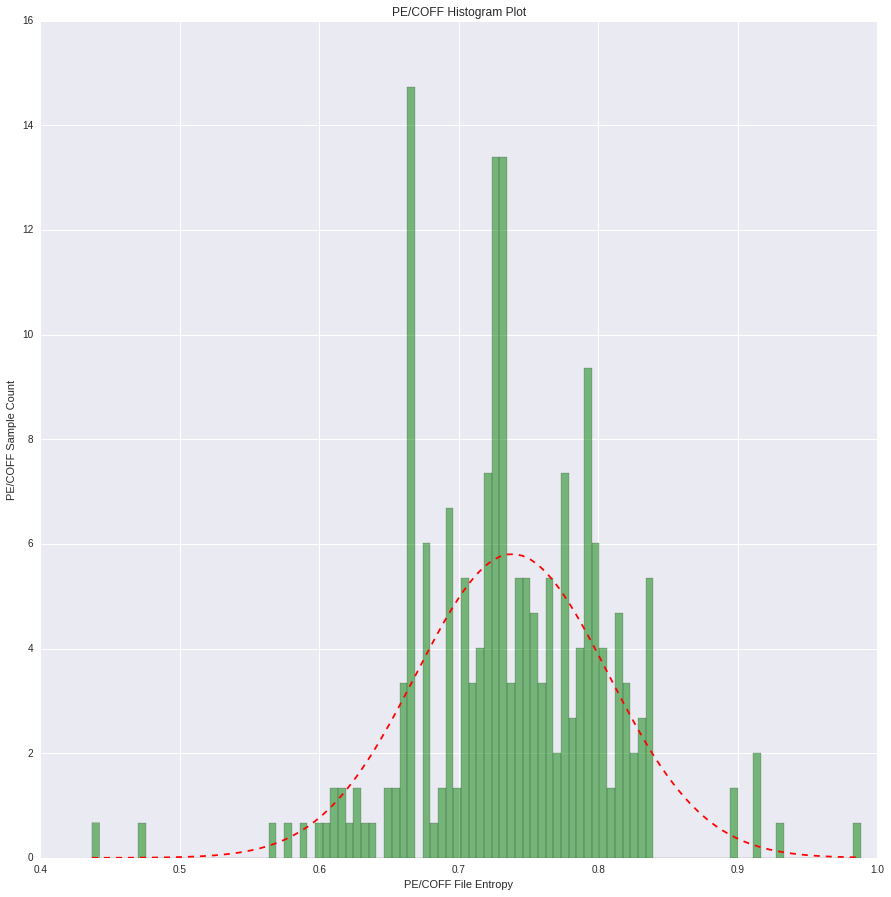

In [5]:
plt.figure(figsize=(15,15))
x_graph = X_all['entropy']
num_bins = 100
n, bins, patches = plt.hist(x_graph, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph.mean(), x_graph.std())
plt.plot(bins, y, 'r--')
plt.xlabel('PE/COFF File Entropy')
plt.ylabel('PE/COFF Sample Count')
plt.title('PE/COFF Histogram Plot')
plt.show()

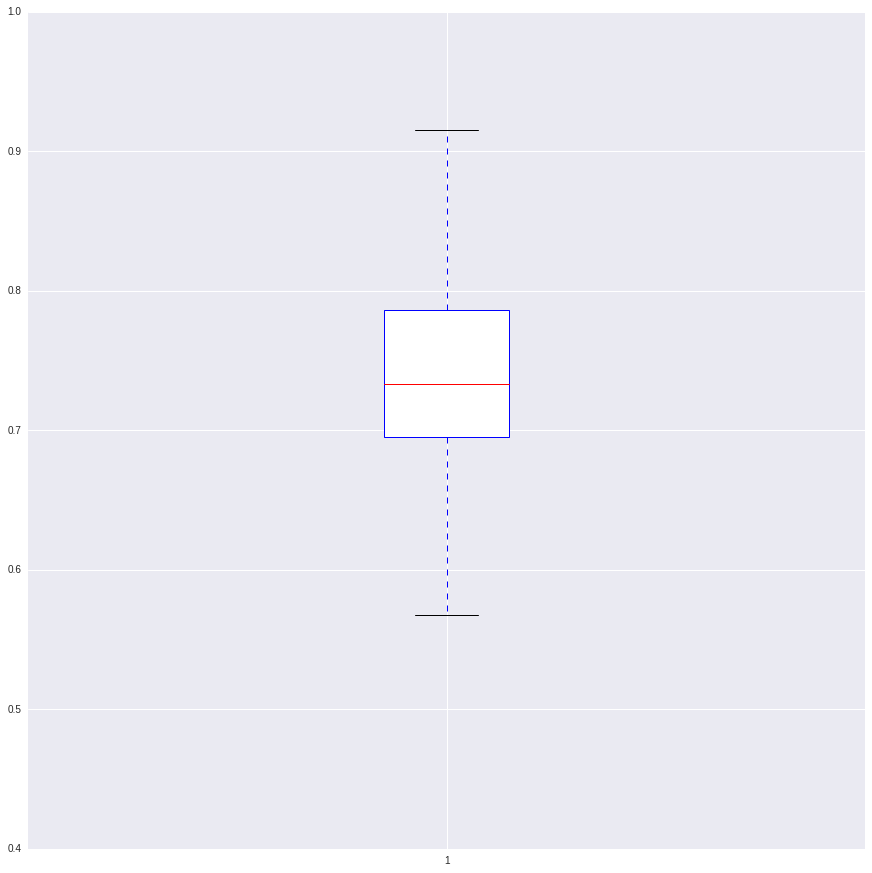

In [6]:
plt.figure(figsize=(15,15))
# rectangular box plot
plt.boxplot(x_graph, showfliers=True, patch_artist=True)
plt.show()

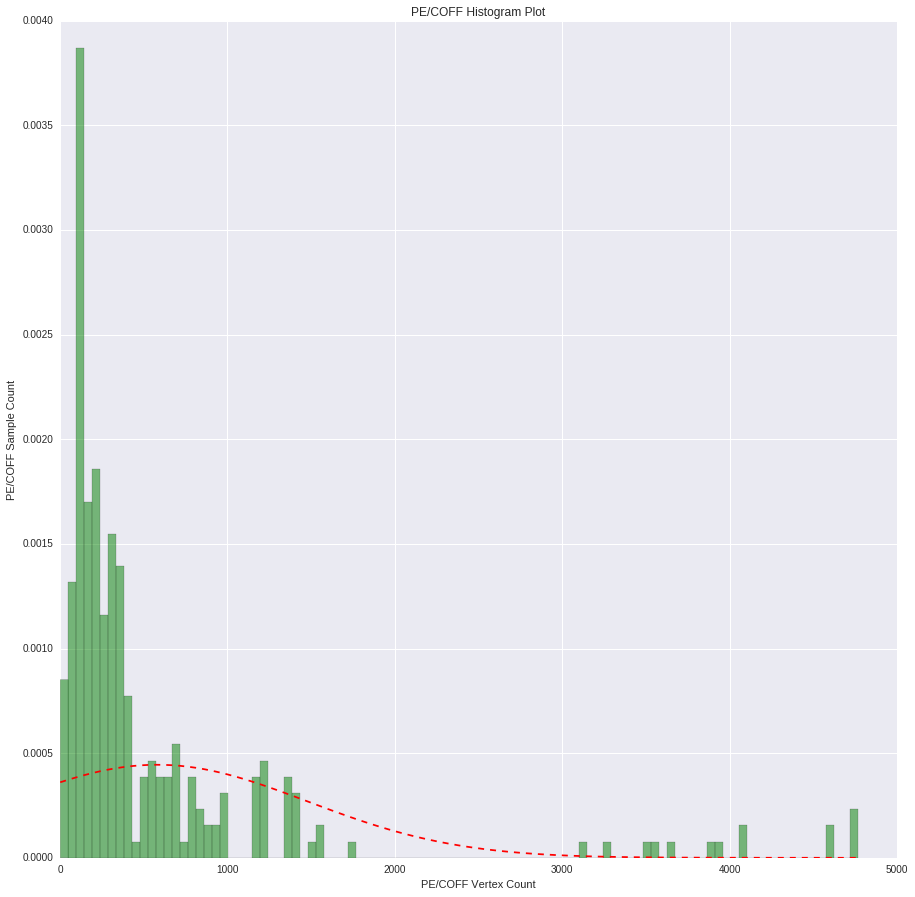

In [7]:
plt.figure(figsize=(15,15))
x_graph = X_all['vertex_count']
num_bins = 100
n, bins, patches = plt.hist(x_graph, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph.mean(), x_graph.std())
plt.plot(bins, y, 'r--')
plt.xlabel('PE/COFF Vertex Count')
plt.ylabel('PE/COFF Sample Count')
plt.title('PE/COFF Histogram Plot')
plt.show()

### 2.1 APT PE/COFF Statistics Graphs.

In [6]:
all_train_stats = pd.read_csv('data/pe-coff-train-stats-apt.csv', index_col=0)
all_train_stats.head()

,feature_name,mean,median,standard_deviation,max,min
0,edx,1234.324723,209.0,3388.710600,18456.0,0.0
1,esi,1899.760148,374.0,4750.651794,26599.0,4.0
2,es,12.911439,0.0,65.888061,448.0,0.0
3,fs,0.202952,0.0,0.724793,3.0,0.0
4,ds,1.642066,0.0,10.513181,78.0,0.0


In [7]:
X = all_train_stats.iloc[:,1:]
y = train_labels['label']

In [14]:
X['mean'].mean()

48784.900738343997

In [16]:
X['mean'].std()

1639444.1667839561

In [ ]:
plt.figure(figsize=(15,15))
x_graph = X['mean']
num_bins = 100
# the histogram of the data, we have to remove the PE header characteristic stats as 
# they are not counts but contain memory base location values and other large values
# that produce huge outliers that ruin the graphs.
n, bins, patches = plt.hist(x_graph[0:119], num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph[0:119].mean(), x_graph[0:119].std())
plt.plot(bins, y, 'r--')
plt.xlabel('ASM Feature Means')
plt.ylabel('ASM Feature Probability')
plt.title('PE/COFF Histogram Plot')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
x_graph = X['median']
num_bins = 100
# the histogram of the data, we have to remove the PE header characteristic stats as 
# they are not counts but contain memory base location values and other large values
# that produce huge outliers that ruin the graphs.
n, bins, patches = plt.hist(x_graph[0:119], num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph[0:119].mean(), x_graph[0:119].std())
plt.plot(bins, y, 'r--')
plt.xlabel('ASM Feature Counts')
plt.ylabel('ASM Feature Means')
plt.title('PE/COFF Histogram Plot')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
x_graph = all_combined_train_features['edx']
num_bins = 100
# the histogram of the data, we have to remove the PE header characteristic stats as 
# they are not counts but contain memory base location values and other large values
# that produce huge outliers that ruin the graphs.
n, bins, patches = plt.hist(x_graph, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph.mean(), x_graph.std())
plt.plot(bins, y, 'r--')
plt.xlabel('EDX Feature Counts')
plt.ylabel('EDX Feature Probability')
plt.title('PE/COFF Histogram Plot')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
# rectangular box plot
plt.boxplot(x_graph, showfliers=True, patch_artist=True)
plt.show()

In [ ]:
help(plt.boxplot)

In [ ]:
plt.figure(figsize=(15,15))
# rectangular box plot
plt.boxplot(x_graph[0:119], vert=True, patch_artist=True)
plt.show()

In [ ]:
# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

In [ ]:
plt.figure(figsize=(15,15))

# Plot also the training points
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(range(X.shape[0]), X.iloc[:, 0], c=range(X.shape[0]), cmap='brg')
plt.xlabel('ASM Feature Index')
plt.ylabel('ASM Feature Means')
plt.title('PE/COFF Scatter Plot')
plt.yscale('log')
plt.show()

In [ ]:
help(pd.read_csv)

## 3. APT Reduced Feature Set Statistics

In [2]:
column_names = list(combined_train_features.columns)

In [ ]:
column_names[:10]

In [3]:
X = combined_train_features.iloc[:,1:]
y = train_labels['label']

In [4]:
# Train feature stats
# X_train_stats = X.describe()
X_train_means = X.mean()
X_train_medians = X.median()
X_train_std = X.std()
X_train_cor = X.corr()
X_train_cov = X.cov()
X_train_means.head()

edx    1234.324723
esi    1899.760148
es       12.911439
fs        0.202952
ds        1.642066
dtype: float64

In [6]:
train_stats = pd.DataFrame()
train_stats['feature_name'] = column_names[1:]
train_stats.head()

,feature_name
0,edx
1,esi
2,es
3,fs
4,ds


In [8]:
#train_stats= pd.DataFrame.join(X_train_means, X_train_medians)
#train_stats = pd.concat([X_train_means, X_train_medians, X_train_std])
#train_stats = train_stats.concat(pd.DataFrame(X_train_medians))
#train_stats = train_stats.merge(pd.DataFrame(X_train_std))
train_stats['mean'] = list(X_train_means) #.join(X_train_medians.to_frame())
train_stats['median'] = list(X_train_medians)
train_stats['standard_deviation'] = list(X_train_std)
#train_stats.columns = ['mean','median','std']
train_stats.head()

,feature_name,mean,median,standard_deviation
0,edx,1234.324723,209.0,3388.710600
1,esi,1899.760148,374.0,4750.651794
2,es,12.911439,0.0,65.888061
3,fs,0.202952,0.0,0.724793
4,ds,1.642066,0.0,10.513181


In [ ]:
plt.figure(figsize=(15,15))

# Plot also the training points
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(range(X.shape[0]), X.iloc[:, 0], c=y, cmap='brg')
plt.xlabel('Sample Index')
plt.ylabel('EDI')
plt.title('PE/COFF Scatter Plot')

plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(range(X.shape[0]), X.iloc[:, 1], c=y, cmap='brg')
plt.xlabel('Sample Index')
plt.ylabel('ESI')
plt.title('PE/COFF Scatter Plot')

plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(range(X_all.shape[0]), X_all.loc[:,'entropy'], c=y, cmap='brg')
plt.xlabel('Sample Index')
plt.ylabel('ESI')
plt.title('PE/COFF Scatter Plot')

plt.show()

In [ ]:
plt.figure(figsize=(15,15))

# Plot also the training points
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='brg')
plt.xlabel('EDI')
plt.ylabel('ESI')
plt.title('PE/COFF Scatter Plot')

plt.show()

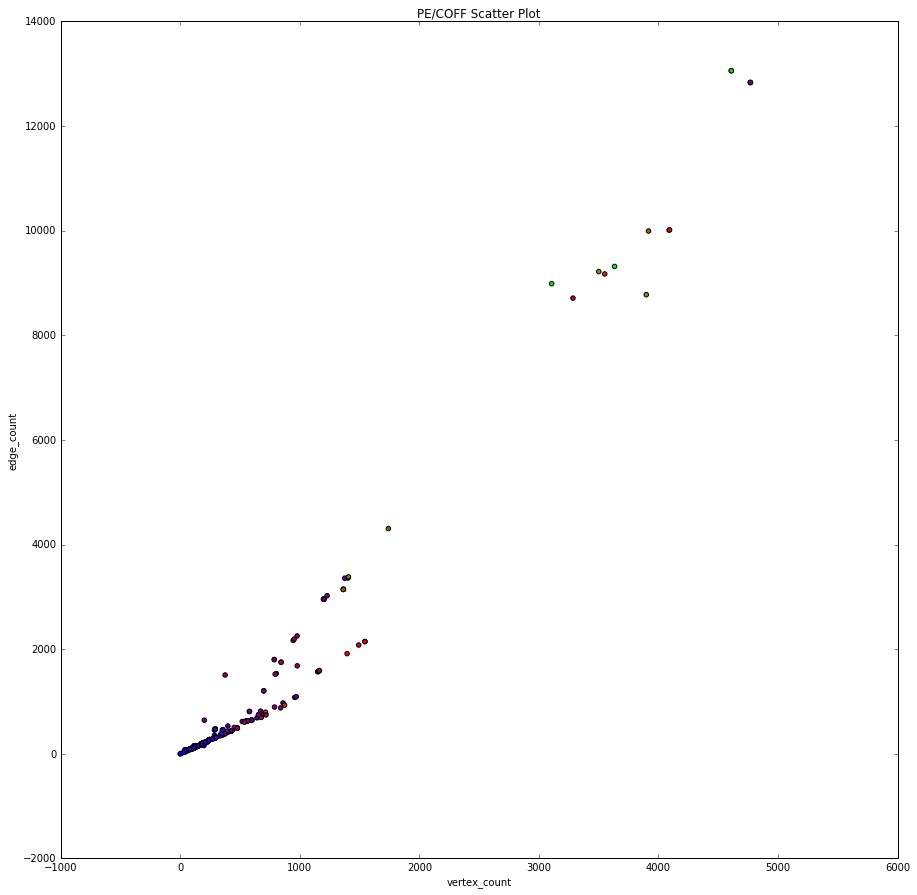

In [4]:
plt.figure(figsize=(15,15))
column_names = list(combined_train_features.columns)
# Plot also the training points
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X.loc[:,'vertex_count'], X.loc[:,'edge_count'], c=X.loc[:,'delta_max'], cmap='brg')
plt.xlabel('vertex_count')
plt.ylabel('edge_count')
plt.title('PE/COFF Scatter Plot')

plt.show()

In [ ]:
column_names = list(combined_train_features.columns)
plt.figure(figsize=(20,400))
for idx in range(20):
    plt.subplot(20, 1, idx + 1)
    
    idx2 = idx + 1
    plt.scatter(X.iloc[:,idx], X.iloc[:,idx2], c=y, cmap='brg')
    plt.xlabel(column_names[idx])
    plt.ylabel(column_names[idx2])
    plt.title('PE/COFF Scatter Plot')
    
plt.show()

In [ ]:
help(plt.subplot)

## 3. VirusShare 251 Statistics.

In [2]:
all_combined_features = pd.read_csv('data/combined-pe-features-vs251.csv')
y = pd.read_csv('data/sorted-pe-coff-train-labels-vs251.csv')
all_combined_features.head()

,file_name,edx,esi,es,fs,ds,ss,gs,cs,ah,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
0,0004376a62e22f6ad359467eb742b8ff,1219,837,0,0,0,0,0,0,34,...,465,740,57,0.022321,0.803515,149720,1,3.5,13,0
1,000634f03457d088c71dbffb897b1315,15109,23202,13,3,3,3,3,3,68,...,5099,14671,633,0.006351,0.957584,1725502,1,4.6,21,1101
2,00072ed24314e91b63b425b3dc572f50,2528,2137,1,0,0,0,0,0,0,...,2460,2458,2058,409.666667,0.486112,328093,1,4.4,5,1060
3,00092d369958b67557da8661cc9093bc,11363,12611,3,3,7,7,3,4,53,...,4811,11668,308,0.007287,0.845657,522936,1,2.2,1,1101
4,0009a64f786fa29bfa6423278cc74f02,202,883,0,0,0,0,0,0,0,...,547,881,289,0.201556,0.996663,671280,1,7.4,1,0


In [5]:
y.head()

,label
0,6
1,9
2,10
3,11
4,13


In [5]:
column_names = all_combined_features.columns
column_names

Index([u'file_name', u'edx', u'esi', u'es', u'fs', u'ds', u'ss', u'gs', u'cs',
       u'ah',
       ...
       u'vertex_count', u'edge_count', u'delta_max', u'density', u'entropy',
       u'file_size', u'file_id', u'percentage', u'trid_id', u'packer_id'],
      dtype='object', length=241)

In [3]:
X_all = all_combined_features.iloc[:,1:]
#y_all = y['family_label']
y_all = list(y['label'])
len(y_all)

54911

In [4]:
X_all.describe()

,edx,esi,es,fs,ds,ss,gs,cs,ah,al,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
count,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,...,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,5.491100e+04,54911.000000,54911.000000,54911.000000,54911.000000
mean,7775.228989,8310.251516,4.991969,0.677515,1.969951,2.441423,0.740252,1.886161,53.565752,1330.756169,...,3690.385260,8023.798929,295.498060,2.333950,0.771353,7.603360e+05,1.768025,5.040496,8.602648,621.189270
std,20935.510273,16254.463343,19.131050,1.867898,10.456076,36.254439,1.891744,58.763507,246.738411,2659.296930,...,6558.913409,15609.320224,2389.842824,54.027074,0.116462,1.552599e+06,3.773995,2.366438,7.814834,556.087178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.006296,1.536000e+03,1.000000,0.000000,0.000000,0.000000
25%,750.000000,793.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85.000000,...,544.500000,803.000000,56.000000,0.006710,0.729897,1.364210e+05,1.000000,2.900000,1.000000,0.000000
50%,3549.000000,3295.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,471.000000,...,1593.000000,3325.000000,159.000000,0.013797,0.798613,4.329520e+05,1.000000,4.600000,5.000000,332.000000
75%,4374.000000,11425.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,53.000000,1650.000000,...,4640.000000,11688.000000,281.000000,0.156504,0.826496,7.292640e+05,1.000000,7.400000,15.000000,1101.000000
max,829214.000000,533660.000000,849.000000,130.000000,644.000000,7880.000000,151.000000,12870.000000,13120.000000,89299.000000,...,267344.000000,354488.000000,217814.000000,11007.666667,0.999999,7.330205e+07,225.000000,9.900000,90.000000,3587.000000


In [6]:
# Train feature stats
X_all_train_means = X_all.mean()
X_all_train_medians = X_all.median()
X_all_train_maxs = X_all.max()
X_all_train_mins = X_all.min()
X_all_train_std = X_all.std()
X_all_train_cor = X_all.corr()
X_all_train_cov = X_all.cov()
X_all_train_maxs.head()

edx    829214.0
esi    533660.0
es        849.0
fs        130.0
ds        644.0
dtype: float64

In [8]:
vs251_stats = pd.DataFrame()
vs251_stats['feature_name'] = list(column_names[1:])
vs251_stats.head()

,feature_name
0,edx
1,esi
2,es
3,fs
4,ds


In [10]:
vs251_stats['mean'] = list(X_all_train_means)
vs251_stats['median'] = list(X_all_train_medians)
vs251_stats['standard_deviation'] = list(X_all_train_std)
vs251_stats['min'] = list(X_all_train_mins)
vs251_stats['max'] = list(X_all_train_maxs)
vs251_stats.head()

,feature_name,mean,median,standard_deviation,min,max
0,edx,7775.228989,3549.0,20935.510273,0.0,829214.0
1,esi,8310.251516,3295.0,16254.463343,0.0,533660.0
2,es,4.991969,1.0,19.131050,0.0,849.0
3,fs,0.677515,0.0,1.867898,0.0,130.0
4,ds,1.969951,0.0,10.456076,0.0,644.0


In [11]:
vs251_stats.to_csv('data/pe-coff-statistics-vs251.csv', index=False)

In [12]:
X_all_train_cor.to_csv('data/pe-coff-corr-vs251.csv', index=False)

In [13]:
X_all_train_cov.to_csv('data/pe-coff-cov-vs251.csv', index=False)

In [9]:
type(X_all_train_means)

pandas.core.series.Series

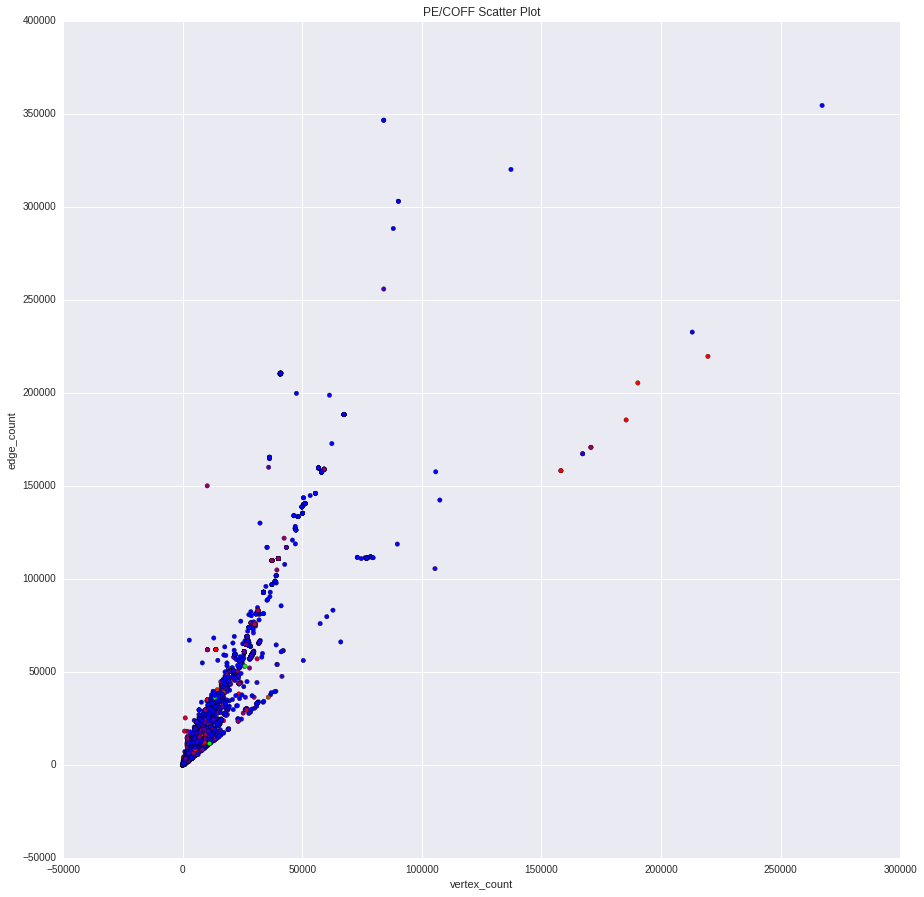

In [10]:
plt.figure(figsize=(15,15))
#column_names = list(combined_train_features.columns)
# Plot also the training points
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X_all.loc[:,'vertex_count'], X_all.loc[:,'edge_count'], c=y_all, cmap='brg')
plt.xlabel('vertex_count')
plt.ylabel('edge_count')
plt.title('PE/COFF Scatter Plot')

plt.show()

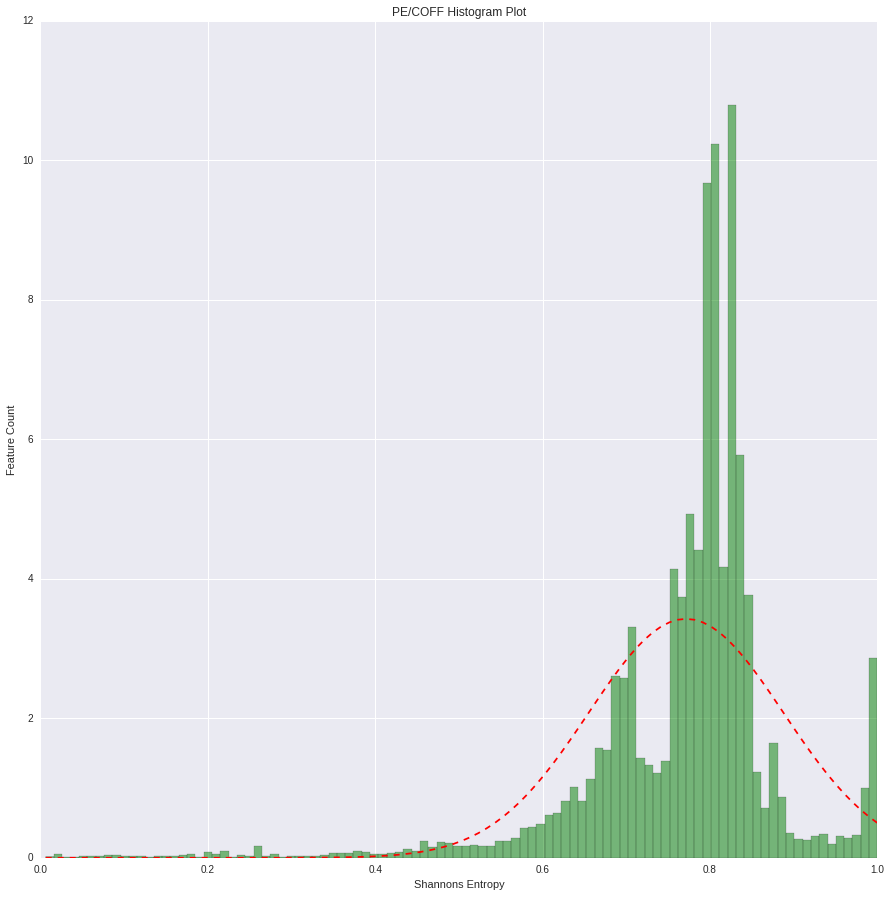

In [12]:
plt.figure(figsize=(15,15))
x_graph = X_all['entropy']
num_bins = 100
n, bins, patches = plt.hist(x_graph, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph.mean(), x_graph.std())
plt.plot(bins, y, 'r--')
plt.xlabel('Shannons Entropy')
plt.ylabel('Feature Count')
plt.title('PE/COFF Histogram Plot')
plt.show()

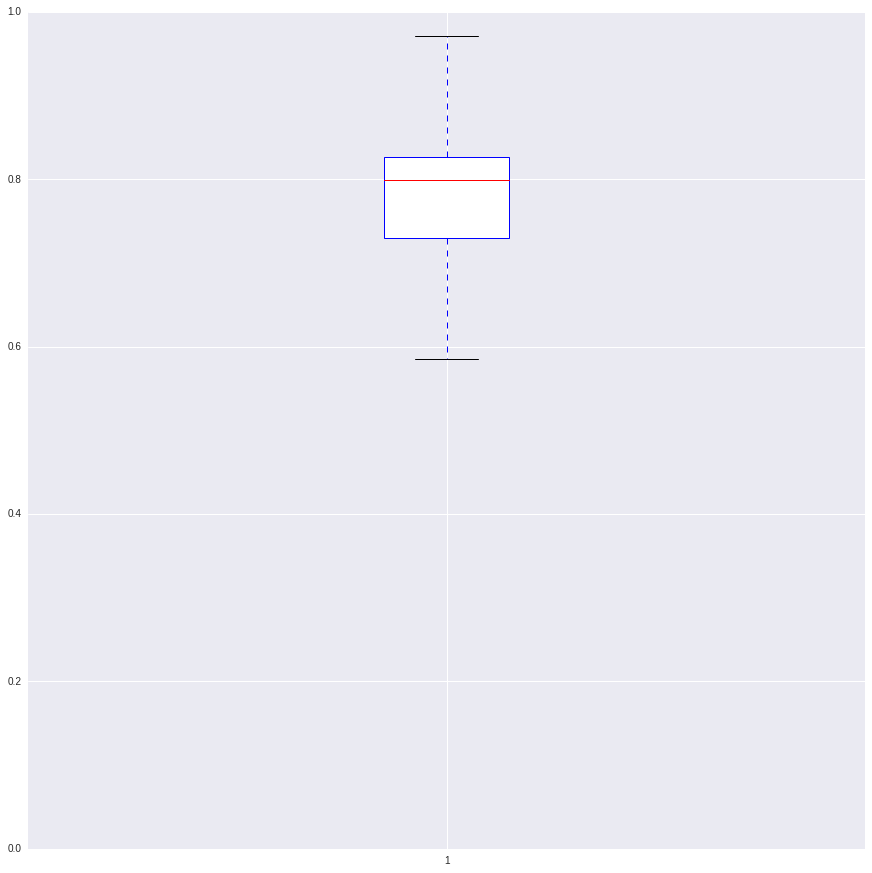

In [13]:
plt.figure(figsize=(15,15))
# rectangular box plot
plt.boxplot(x_graph, vert=True, patch_artist=True)
plt.show()

## Analyse PE/COFF Function Count Features vs251.

In [5]:
function_count_features = pd.read_csv('data/sorted-pe-function-count-features-10percent-vs251.csv', na_filter=False)
sorted_train_labels = pd.read_csv('data/sorted-train-labels-vs251.csv', na_filter=False)
y = pd.read_csv('data/sorted-pe-coff-train-labels-vs251.csv', na_filter=False)
function_count_features.head()

,filename,sub_4,ebx,loc_4,edi,eax+4,edx+0,eax+0,edx+3,eax,...,ebp-11Ch,_5FE0,_1711,_1712,_1204,a_YyDTHn+7,_2EB8,_2EB7,aLe_LxUlQ+0Ah,_1059
0,0004376a62e22f6ad359467eb742b8ff,4,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,000634f03457d088c71dbffb897b1315,16,2,1,5,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
2,00072ed24314e91b63b425b3dc572f50,3,6,0,48,2,0,0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,00092d369958b67557da8661cc9093bc,6,2,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0009a64f786fa29bfa6423278cc74f02,1,4,0,4,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sorted_train_labels.head()

,file_name,malware_type_x,sample_label,family_name,family_label
0,00027c21667d9119a454df8cef2dc1c7,Trojan:JS/Redirector.QE,4,JS.Trojan.Redirector,4
1,0003887ab64b8ae19ffa988638decac2,OK,0,unknown,0
2,0004376a62e22f6ad359467eb742b8ff,Worm:Win32/Picsys.C,6,Win32.Worm.Picsys,6
3,000634f03457d088c71dbffb897b1315,Worm:Win32/Rebhip,9,Win32.Worm.Rebhip,9
4,00072ed24314e91b63b425b3dc572f50,VirTool:Win32/VBInject.UG,10,Win32.VirTool.VBInject,10


In [5]:
y.head()

,label
0,6
1,9
2,10
3,11
4,13


In [6]:
X_all = function_count_features.iloc[:,1:]
y_all = list(y['label'])
len(y_all)

54911

In [7]:
X_all.describe()

,sub_4,ebx,loc_4,edi,eax+4,edx+0,eax+0,edx+3,eax,esi,...,ebp-11Ch,_5FE0,_1711,_1712,_1204,a_YyDTHn+7,_2EB8,_2EB7,aLe_LxUlQ+0Ah,_1059
count,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,...,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000,54911.000000
mean,4.737575,2.699131,1.257471,4.090747,1.030832,0.614321,0.579902,0.616124,1.990931,6.489629,...,0.000055,0.000255,0.000109,0.000109,0.000146,0.000109,0.000091,0.000127,0.000200,0.000073
std,16.922756,26.254831,2.322896,58.959207,5.745594,6.109029,4.957825,11.232029,8.584228,48.453143,...,0.012802,0.059745,0.018105,0.018105,0.024140,0.025605,0.021337,0.029872,0.039344,0.017070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2238.000000,4727.000000,84.000000,11122.000000,675.000000,740.000000,647.000000,1849.000000,540.000000,4433.000000,...,3.000000,14.000000,3.000000,3.000000,4.000000,6.000000,5.000000,7.000000,9.000000,4.000000


In [8]:
function_count_features.shape

(54911, 438)

In [8]:
temp_x_4_std = X_all['sub_4'].std() * 4
temp_x_4_std

67.69102560603055

In [9]:
# OK, We are good to go :)
# Lets have a look at some graphs first.
plt.figure(figsize=(15,15))
x_graph = X_all['sub_4'].clip(-temp_x_4_std, temp_x_4_std)
num_bins = 100
n, bins, patches = plt.hist(x_graph, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph.mean(), x_graph.std())
plt.plot(bins, y, 'r--')
plt.xlabel('Function Count (sub_4)')
plt.ylabel('Function Count Percentage')
plt.title('PE/COFF Function Count Histogram Plot')
plt.show()

In [10]:
plt.figure(figsize=(15,15))
# rectangular box plot
plt.boxplot(x_graph, vert=True, patch_artist=True)
plt.show()

In [ ]:
help(pd.DataFrame.clip)

## 4. VirusShare 252 Statistics.

In [2]:
all_combined_features = pd.read_csv('data/combined-pe-features-vs252.csv')
all_train_labels = pd.read_csv('data/sorted-pe-coff-train-labels-vs252.csv')
all_combined_features.head()

,file_name,edx,esi,es,fs,ds,ss,gs,cs,ah,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
0,000118d12cbf9ad6103e8b914a6e1ac3,2151,2782,2,2,2,2,2,2,37,...,2213,3300,101,0.002277,0.834382,201600,1,2.2,1,1101
1,00093d5fa5cb7ce77f6eaf39962daa12,4207,11425,4,2,6,6,2,3,53,...,4640,12158,204,0.005596,0.803481,742064,1,8.1,17,1101
2,00099926d51b44c6f8c93a48c2567891,270,1033,0,0,0,0,0,0,0,...,522,868,284,0.267901,0.997032,725288,4,4.8,3,0
3,000a2db4762dc06628a086c9e117f884,43,1281,0,0,0,0,0,0,0,...,871,959,70,0.035789,0.535436,61551,5,3.5,13,153
4,000ae2c63ba69fc93dfc395b40bfe03a,4334,12557,11,3,8,7,3,11,41,...,3939,7218,82,0.004668,0.899481,487386,1,4.0,17,0


In [3]:
all_train_labels.head()

,label
0,2
1,11
2,12
3,14
4,1


In [3]:
X_all = all_combined_features.iloc[:,1:]
y_all = list(all_train_labels['label'])
len(y_all)

46165

In [4]:
X_all.shape

(46165, 129)

In [ ]:
feature_names = list(X_all.columns)
feature_names

In [10]:
vs252_stats = pd.DataFrame()
vs252_stats['feature_name'] = feature_names
vs252_stats['mean'] = list(X_all.mean())
vs252_stats['median'] = list(X_all.median())
vs252_stats['standard_deviation'] = list(X_all.std())
vs252_stats['min'] = list(X_all.min())
vs252_stats['max'] = list(X_all.max())
vs252_stats.head()

,feature_name,mean,median,standard_deviation,min,max
0,edx,7432.562244,2632.0,22220.909001,0.0,829016.0
1,esi,8314.144698,3295.0,17455.511147,0.0,532781.0
2,es,5.041308,2.0,22.058726,0.0,1564.0
3,fs,0.760706,0.0,1.925883,0.0,130.0
4,ds,2.302155,0.0,14.244223,0.0,1403.0


In [11]:
vs252_stats.to_csv('data/pe-coff-statistics-vs252.csv', index=False)

## Analyse PE/COFF Function Count Features vs252.

In [5]:
function_count_features = pd.read_csv('data/sorted-pe-function-count-features-10percent-vs252.csv', na_filter=False)
sorted_train_labels = pd.read_csv('data/sorted-train-labels-vs252.csv', na_filter=False)
y = pd.read_csv('data/sorted-pe-coff-train-labels-vs252.csv', na_filter=False)
function_count_features.head()

,filename,sub_4,eax,__vba,eax+4,eax+6,MSVBVM60_600,ecx+6,loc_4,edx+6,...,DrawStateYGHPAUH,GetNextPtrCSimpl,esp+24h+arg_4,_2AA0,CommandToIndexCS,OnWizardBackCPro,HATLYAAV$CString,_1259,this>,CloseFile
0,000118d12cbf9ad6103e8b914a6e1ac3,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,00093d5fa5cb7ce77f6eaf39962daa12,2,1,0,1,1,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,00099926d51b44c6f8c93a48c2567891,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000a2db4762dc06628a086c9e117f884,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000ae2c63ba69fc93dfc395b40bfe03a,1,1,0,1,2,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
function_count_features.head(10)

,filename,sub_4,eax,__vba,eax+4,eax+6,MSVBVM60_600,ecx+6,loc_4,edx+6,...,DrawStateYGHPAUH,GetNextPtrCSimpl,esp+24h+arg_4,_2AA0,CommandToIndexCS,OnWizardBackCPro,HATLYAAV$CString,_1259,this>,CloseFile
0,000118d12cbf9ad6103e8b914a6e1ac3,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,00093d5fa5cb7ce77f6eaf39962daa12,2,1,0,1,1,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,00099926d51b44c6f8c93a48c2567891,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000a2db4762dc06628a086c9e117f884,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000ae2c63ba69fc93dfc395b40bfe03a,1,1,0,1,2,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,00141c655466c1b44e56cb774a502fef,6,1,0,1,1,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
6,0016c495ef6df452428a2fef9e2b0418,7,1,0,1,1,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
7,001ea100e348e7f72a8f1b5f737dbd0a,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,001f21fcfc8299d10af88ced33681658,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0025420de5eeae2b56a44366aabdfe7a,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
sorted_train_labels.head(10)

,file_name,malware_type_x,sample_label,family_name,family_label
0,00002e640cafb741bea9a48eaee27d6f,Virus:Win32/Parite.B,1,Win32.Virus.Parite,1
1,000118d12cbf9ad6103e8b914a6e1ac3,SoftwareBundler:Win32/Techsnab,2,Win32.SoftwareBundler.Techsnab,2
2,0001776237ac37a69fcef93c1bac0988,TrojanDropper:Win32/Sventore.B,3,Win32.TrojanDropper.Sventore,3
3,000403e4e488356b7535cc613fbeb80b,TrojanDownloader:Win32/Fosniw.B,5,Win32.TrojanDownloader.Fosniw,5
4,0004c8b2a0f4680a5694d74199b40ea2,SoftwareBundler:Win32/ICLoader,7,Win32.SoftwareBundler.ICLoader,7
5,000595d8b586915c12053104cf845097,BrowserModifier:Win32/Diplugem,8,Win32.BrowserModifier.Diplugem,8
6,00093d5fa5cb7ce77f6eaf39962daa12,Adware:Win32/Hotbar,11,Win32.Adware.Hotbar,11
7,00099926d51b44c6f8c93a48c2567891,SoftwareBundler:Win32/OutBrowse,12,Win32.SoftwareBundler.OutBrowse,12
8,000a2db4762dc06628a086c9e117f884,PWS:Win32/Lolyda.AT,14,Win32.PWS.Lolyda,14
9,000ae2c63ba69fc93dfc395b40bfe03a,Virus:Win32/Parite.B,1,Win32.Virus.Parite,1


In [13]:
y.head()

,label
0,2
1,11
2,12
3,14
4,1


In [6]:
X_all = function_count_features.iloc[:,1:]
y_all = list(y['label'])
len(y_all)

46165

In [7]:
X_all.describe()

,sub_4,eax,__vba,eax+4,eax+6,MSVBVM60_600,ecx+6,loc_4,edx+6,ecx+4,...,DrawStateYGHPAUH,GetNextPtrCSimpl,esp+24h+arg_4,_2AA0,CommandToIndexCS,OnWizardBackCPro,HATLYAAV$CString,_1259,this>,CloseFile
count,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,...,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000,46165.000000
mean,4.561529,2.077461,12.224412,1.152237,0.573270,0.297671,0.563197,1.429655,0.381653,1.034702,...,0.000173,0.000152,0.000260,0.000498,0.000108,0.000065,0.000152,0.000108,0.000087,0.000087
std,14.123616,8.949396,744.724217,6.526771,3.304865,0.977649,1.787450,6.842401,2.056396,7.088918,...,0.037233,0.032579,0.039492,0.107046,0.019190,0.013963,0.032579,0.023271,0.018617,0.018617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1120.000000,630.000000,134546.000000,693.000000,333.000000,36.000000,223.000000,1025.000000,218.000000,1211.000000,...,8.000000,7.000000,6.000000,23.000000,4.000000,3.000000,7.000000,5.000000,4.000000,4.000000


In [8]:
temp_x_4_std = X_all['sub_4'].std() * 4
temp_x_4_std

56.494463985210224

In [9]:
# Histogram
plt.figure(figsize=(15,15))
x_graph = X_all['sub_4'].clip(-temp_x_4_std, temp_x_4_std)
num_bins = 100
n, bins, patches = plt.hist(x_graph, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, x_graph.mean(), x_graph.std())
plt.plot(bins, y, 'r--')
plt.xlabel('Function Count (sub_4)')
plt.ylabel('Function Count Percentage')
plt.title('PE/COFF Function Count Histogram Plot')
plt.show()

In [10]:
# rectangular box plot
plt.figure(figsize=(15,15))
plt.boxplot(x_graph, vert=True, patch_artist=True)
plt.show()

In [13]:
#fig, axes = plt.subplots(nrows=2, ncols=10)
#df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A')
column_names = list(X_all.columns)
plt.figure(figsize=(20,400))

for idx in range(10):
    plt.subplot(10, 1, idx + 1)
    
    idx2 = idx + 1
    plt.scatter(X_all.iloc[:,idx], X_all.iloc[:,idx2], c=y, cmap='brg')
    plt.xlabel(column_names[idx])
    plt.ylabel(column_names[idx2])
    plt.title('PE/COFF Scatter Plot')
    
plt.show()

In [31]:
temp_x_3_std = X_all.iloc[:,0:10].std() * 3
temp_x_3_std

sub_4             42.370848
eax               26.848189
__vba           2234.172650
eax+4             19.580312
eax+6              9.914596
MSVBVM60_600       2.932946
ecx+6              5.362349
loc_4             20.527202
edx+6              6.169188
ecx+4             21.266754
dtype: float64

In [32]:
temp_x_2_std = X_all.iloc[:,0:10].std() * 2
temp_x_2_std

sub_4             28.247232
eax               17.898793
__vba           1489.448433
eax+4             13.053542
eax+6              6.609731
MSVBVM60_600       1.955297
ecx+6              3.574899
loc_4             13.684801
edx+6              4.112792
ecx+4             14.177836
dtype: float64

In [33]:
temp_x_1_std = X_all.iloc[:,0:10].std()
temp_x_1_std

sub_4            14.123616
eax               8.949396
__vba           744.724217
eax+4             6.526771
eax+6             3.304865
MSVBVM60_600      0.977649
ecx+6             1.787450
loc_4             6.842401
edx+6             2.056396
ecx+4             7.088918
dtype: float64

In [53]:
plt.figure(figsize=(20,10));
temp_x_3_std = X_all.iloc[:,0:10].std()
x_graph = X_all.iloc[:,0:10].clip(0, temp_x_3_std, axis=1) # apply the clip function column wise.
x_graph = X_all.iloc[:,0:10].clip(0, 10, axis=1)
bp = x_graph.boxplot()
plt.show()

In [59]:
X_all['__vba'].mean()

12.224412433661865

In [60]:
X_all['__vba'].max()

134546

In [56]:
x_graph['__vba'].min()

0

In [61]:
X_all['__vba'].std()

744.72421672628639

In [16]:
plt.show()

In [ ]:
df = DataFrame

In [ ]:
help(pd.DataFrame.std)

In [ ]:
help(pd.DataFrame.clip)

## 5. VirusShare 263 Statistics.

In [2]:
all_combined_features = pd.read_csv('data/combined-pe-features-vs263.csv')
all_train_labels = pd.read_csv('data/sorted-pe-coff-train-labels-vs263.csv')
all_combined_features.head()

,file_name,edx,esi,es,fs,ds,ss,gs,cs,ah,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
0,0002b2f621ea5786be03bf4153532dce,52,490,0,0,0,0,0,0,4,...,365,518,74,0.234283,0.684706,81812,5,7.4,1,0
1,000401419eccde59975c713cfadc974c,4378,3246,1,0,0,0,0,0,34,...,1593,3310,56,0.006680,0.800788,137131,1,5.4,4,317
2,0004824a60ff9fe1fb30d669a5baa627,4374,3295,1,0,0,0,0,0,34,...,1593,3325,56,0.006710,0.802050,137630,1,5.4,4,317
3,0006d2cd674c8501ffe59dae330ffcb5,2100,959,0,0,0,0,0,0,0,...,717,2167,285,0.049634,0.762935,83819,1,8.3,13,0
4,0007893715059c51a92d3ce2b10d9cf5,163,180,0,0,0,0,0,0,31,...,795,1193,355,0.052839,0.812079,120832,1,3.5,13,0


In [3]:
X_all = all_combined_features.iloc[:,1:]
y_all = all_train_labels['label']
X_all.head()

,edx,esi,es,fs,ds,ss,gs,cs,ah,al,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
0,52,490,0,0,0,0,0,0,4,36,...,365,518,74,0.234283,0.684706,81812,5,7.4,1,0
1,4378,3246,1,0,0,0,0,0,34,902,...,1593,3310,56,0.006680,0.800788,137131,1,5.4,4,317
2,4374,3295,1,0,0,0,0,0,34,890,...,1593,3325,56,0.006710,0.802050,137630,1,5.4,4,317
3,2100,959,0,0,0,0,0,0,0,548,...,717,2167,285,0.049634,0.762935,83819,1,8.3,13,0
4,163,180,0,0,0,0,0,0,31,106,...,795,1193,355,0.052839,0.812079,120832,1,3.5,13,0


In [4]:
X_all.shape

(40974, 129)

In [5]:
len(y_all)

40974

In [ ]:
feature_names = list(X_all.columns)
feature_names

In [8]:
vs263_stats = pd.DataFrame()
vs263_stats['feature_name'] = feature_names
vs263_stats['mean'] = list(X_all.mean())
vs263_stats['median'] = list(X_all.median())
vs263_stats['standard_deviation'] = list(X_all.std())
vs263_stats['min'] = list(X_all.min())
vs263_stats['max'] = list(X_all.max())
vs263_stats.head()

,feature_name,mean,median,standard_deviation,min,max
0,edx,8958.242715,4374.0,21500.912138,0.0,829258.0
1,esi,8446.356494,3295.0,17063.190547,0.0,533577.0
2,es,5.308366,1.0,19.647030,0.0,849.0
3,fs,0.578757,0.0,1.657220,0.0,130.0
4,ds,1.815224,0.0,7.783262,0.0,644.0


In [9]:
vs263_stats.to_csv('data/pe-coff-statistics-vs263.csv', index=False)

## PE/COFF Function Count Features vs263

In [2]:
function_count_features = pd.read_csv('data/sorted-pe-function-count-features-10percent-vs263.csv', na_filter=False)
sorted_train_labels = pd.read_csv('data/sorted-train-labels-vs263.csv', na_filter=False)
y = pd.read_csv('data/sorted-pe-coff-train-labels-vs263.csv', na_filter=False)
function_count_features.head()

,filename,eax,sub_4,ebx,loc_4,edi,esi,edx+3,edx+0,eax+0,...,_44D7,MSVBVM60_676,_5509,_80af,*0x80ce8e8,*-0x40(%ebp),ebp+var_143C,ebp+var_1454,GetToken,RegisterLocalCmd
0,0002b2f621ea5786be03bf4153532dce,1,0,1,0,3,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000401419eccde59975c713cfadc974c,1,7,1,1,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0004824a60ff9fe1fb30d669a5baa627,1,7,1,1,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0006d2cd674c8501ffe59dae330ffcb5,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0007893715059c51a92d3ce2b10d9cf5,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_all = function_count_features.iloc[:,1:]
y_all = list(y['label'])
len(y_all)

40974

In [4]:
sorted_train_labels.head()

,file_name,malware_type_x,sample_label,family_name,family_label
0,0002b2f621ea5786be03bf4153532dce,PWS:Win32/OnLineGames.LW,59,Win32.PWS.OnLineGames,23
1,000401419eccde59975c713cfadc974c,Worm:Win32/Soltern!rfn,36,Win32.Worm.Soltern,29
2,00042f23bc15b89d9c6a7bde0e316f8b,Rogue:Win32/FakeRean,117,Win32.Rogue.FakeRean,93
3,0004824a60ff9fe1fb30d669a5baa627,Worm:Win32/Soltern.L,30,Win32.Worm.Soltern,29
4,0004c49071481789f1c8c80656638497,OK,0,unknown,0


## 6. VirusShare 264 Statistics.

In [2]:
all_combined_features = pd.read_csv('data/combined-pe-features-vs264.csv')
all_train_labels = pd.read_csv('data/sorted-pe-coff-train-labels-vs264.csv')
all_combined_features.head()

,file_name,edx,esi,es,fs,ds,ss,gs,cs,ah,...,vertex_count,edge_count,delta_max,density,entropy,file_size,file_id,percentage,trid_id,packer_id
0,0006bac4260d377e3bf2b9cfea530eb9,8714,16348,39,8,9,12,8,8,73,...,4689,8093,377,0.005650,0.820715,2015064.0,1,2.6,7,1101
1,0006e6b536f6622bf308e80f837ceaeb,4374,3295,1,0,0,0,0,0,34,...,1593,3325,56,0.006710,0.804215,138620.0,1,5.4,4,317
2,0007106c237e8689cc68b5111db1a174,3549,13709,8,0,0,0,0,0,76,...,5753,11775,168,0.013797,0.826531,524877.0,1,8.1,17,1101
3,00094c34bd1a0f622b49c1b1b9274ae6,1167,4780,0,0,0,0,0,0,0,...,2737,3884,125,0.011075,0.833980,325328.0,1,7.4,1,1101
4,000b01ac8e485e5a143ff577be88b853,1703,1181,0,0,0,0,0,0,32,...,575,1052,59,0.018804,0.983293,304458.0,1,7.7,12,0


In [3]:
all_train_labels.head()

,label
0,0
1,29
2,78
3,76
4,0


In [4]:
all_train_labels.shape

(14366, 1)

In [5]:
all_combined_features.shape

(14366, 130)

In [6]:
X_all = all_combined_features.iloc[:,1:]
y_all = list(all_train_labels['label'])

In [8]:
feature_names = list(X_all.columns)
vs264 = pd.DataFrame()
vs264['feature_name'] = feature_names
vs264['mean'] = list(X_all.mean())
vs264['median'] = list(X_all.median())
vs264['standard_deviation'] = list(X_all.std())
vs264['min'] = list(X_all.min())
vs264['max'] = list(X_all.max())
vs264.head()

,feature_name,mean,median,standard_deviation,min,max
0,edx,6530.772866,3897.0,16141.626223,0.0,326822.0
1,esi,6655.292914,3295.0,13191.224338,0.0,245708.0
2,es,3.869901,1.0,16.305792,0.0,582.0
3,fs,0.606919,0.0,1.900652,0.0,176.0
4,ds,1.474593,0.0,6.103118,0.0,420.0


In [9]:
vs264.to_csv('data/pe-coff-statistics-vs264.csv', index=False)

## PE/COFF Function Count Features vs264

In [ ]:
function_count_features = pd.read_csv('data/sorted-pe-function-count-features-10percent-vs264.csv', na_filter=False)
sorted_train_labels = pd.read_csv('data/sorted-train-labels-vs264.csv', na_filter=False)
y = pd.read_csv('data/sorted-pe-coff-train-labels-vs264.csv', na_filter=False)
function_count_features.head()